# Dataset

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

# Загрузка датасета
dataset = load_dataset("zloelias/lenta-ru")

train_data = load_dataset("zloelias/lenta-ru", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train-00000-of-00001.parquet:   0%|          | 0.00/240M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/26.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/185972 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/20664 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

# Загрузка данных
df = pd.DataFrame(train_data)

In [ ]:
print(df.info())  # Типы данных и наличие пустых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185972 entries, 0 to 185971
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   185972 non-null  object
 1   text    185972 non-null  object
 2   topic   185972 non-null  object
 3   labels  185972 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.7+ MB
None


In [ ]:
print(df.describe(include='all'))  # Основные статистики

                                    title           text      topic  \
count                              185972         185972     185972   
unique                             185238         185790          5   
top     ЦБ отозвал лицензии у двух банков  РИА "Новости"  Экономика   
freq                                   12             78      57239   
mean                                  NaN            NaN        NaN   
std                                   NaN            NaN        NaN   
min                                   NaN            NaN        NaN   
25%                                   NaN            NaN        NaN   
50%                                   NaN            NaN        NaN   
75%                                   NaN            NaN        NaN   
max                                   NaN            NaN        NaN   

               labels  
count   185972.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         1.400872  
std

In [ ]:
print(df.head())

                                               title  \
0     Два немца стали кандидатами в тренеры "Динамо"   
1         Россия добавит тяги китайским истребителям   
2  «Газпром» пересмотрел планы по строительству «...   
3  Российские зрители не услышат, как поет Ричард...   
4  Призовой фонд Australian Open-2013 достиг реко...   

                                                text            topic  labels  
0  Два немецких футбольных тренера стали кандидат...            Спорт       1  
1  Российские турбореактивные двигатели РД-93, пр...  Наука и техника       2  
2  «Газпром» сократил протяженность участка газоп...           Бизнес       4  
3  \nНа экраны российских кинотеатров выходит оди...         Культура       3  
4  Организаторы Открытого чемпионата Австралии по...            Спорт       1  


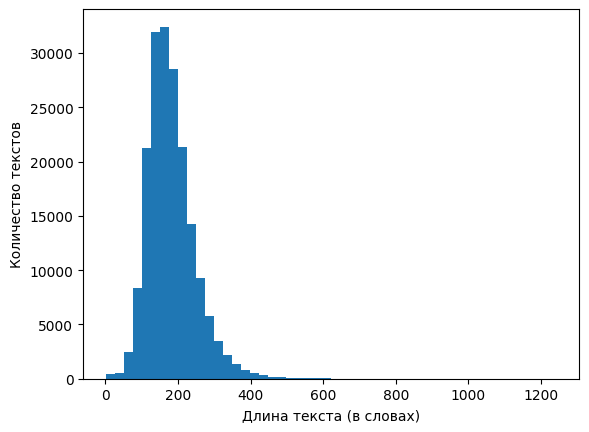

count    185972.000000
mean        181.215339
std          66.088910
min           1.000000
25%         137.000000
50%         171.000000
75%         214.000000
max        1243.000000
Name: text_length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

df['text_length'] = df['text'].apply(lambda x: len(x.split()))
plt.hist(df['text_length'], bins=50)
plt.xlabel("Длина текста (в словах)")
plt.ylabel("Количество текстов")
plt.show()

print(df['text_length'].describe())

In [ ]:
print(df['labels'].value_counts())  # Подсчёт по категориям

labels
0    57239
1    46434
3    38805
2    38151
4     5343
Name: count, dtype: int64


In [ ]:
df.drop_duplicates(subset=['text'], inplace=True)
print(f"Количество строк после удаления дубликатов: {len(df)}")

Количество строк после удаления дубликатов: 185790


In [ ]:
# Удаление слишком коротких текстов (например, менее 10 слов)
df_balanced = df_balanced[df_balanced['text'].apply(lambda x: len(x.split()) > 10)]

In [ ]:
# Обрезка текстов до 512 слов
max_length = 512
df_balanced['text'] = df_balanced['text'].apply(lambda x: ' '.join(x.split()[:max_length]))

In [ ]:
from sklearn.utils import resample

# Создадим выборки для каждой категории
df_0 = df[df['labels'] == 0]
df_1 = df[df['labels'] == 1]
df_2 = df[df['labels'] == 2]
df_3 = df[df['labels'] == 3]
df_4 = df[df['labels'] == 4]

# Уменьшим количество данных для категории 0 до количества данных в категории 4
df_0_downsampled = resample(df_0, replace=False, n_samples=5, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=5, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=5, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=5, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=5, random_state=42)
df_balanced = pd.concat([df_0_downsampled, df_1_downsampled, df_2_downsampled, df_3_downsampled, df_4_downsampled])

print(df_balanced['labels'].value_counts())  # Проверим новое распределение

labels
0    5
1    5
2    5
3    5
4    5
Name: count, dtype: int64


In [ ]:
# Удаляем ненужные столбцы
df_final = df_balanced.drop(columns=['title', 'topic', 'text_length', 'labels'])

# Проверяем оставшиеся столбцы
print(df_final.head(20))

                                                     text
103129  Вопрос индексации зарплат бюджетников, которых...
76159   Российские фондовые индексы по итогам 24 июня ...
172881  Бывший глава ЮКОСа Михаил Ходорковский и его п...
103221  Пошлины на экспорт нефти из России достигнут о...
102848  Российский министр по налогам и сборам Алексан...
177912  Главный тренер сборной России по футболу Дик А...
2304    Леонид Слуцкий официально покинул пост главног...
12892   Обладательница бронзовой медали Олимпиады-2008...
27568   Оргкомитет Олимпиады-2004, которая будет прохо...
180554  Британский боксер-тяжеловес, чемпион мира по в...
96093   Геофизик Стивен Мейерс из Висконсинского униве...
1002    Мобильная платформа Intel Centrino 2 будет пре...
18473   Электротехники-любители представили новый виде...
12150   Министерство обороны России объявило тендер на...
83302   Ровер Opportunity начал движение в сторону хре...
123160  Телеканал Fox начал разработку сериала "Олимп"...
169882  Лучшим

In [ ]:
df_final.to_csv('final_dataset.csv', index=False)

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
DEVICE = torch.device("cuda:0")

# Для большей наглядности будем работать с русскоязычной версией GPT от Сбера.
# Ниже находятся команды для загрузки и инициализации модели и токенизатора.
model_name = "sberbank-ai/rugpt3medium_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).to(DEVICE)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling

train_path = 'final_dataset.csv'

# Создание датасета
train_dataset = TextDataset(tokenizer=tokenizer, file_path=train_path, block_size=64)

# Создание даталодера (нарезает текст на оптимальные по длине куски)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./finetuned",       # директория с выходными данными
    overwrite_output_dir=True,      # перезаписываем содержимое выходной директории при каждом запуске
    num_train_epochs=200,           # число эпох обучения
    per_device_train_batch_size=32, # batch size для обучения
    per_device_eval_batch_size=32,  # batch size для выполнения
    warmup_steps=10,                # количество шагов для "прогрева" (управление скоростью обучения)
    gradient_accumulation_steps=16, # накопление градиента (16 шагов накапливаем градиенты для batch_size, эмуляция вычисления на пакете 16 * 32 для слабых GPU)
    )

# Инициализируем класс обучения
trainer = Trainer(
    model=model,                 # модель
    args=training_args,          # параметры обучения
    data_collator=data_collator, # загрузчик данных
    train_dataset=train_dataset, # датасет для обучения
    optimizers = (torch.optim.AdamW(model.parameters(), lr=1e-5), None) # оптимизатор
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss


TrainOutput(global_step=200, training_loss=0.32260593414306643, metrics={'train_runtime': 959.4373, 'train_samples_per_second': 21.054, 'train_steps_per_second': 0.208, 'total_flos': 2344969253683200.0, 'train_loss': 0.32260593414306643, 'epoch': 200.0})

In [ ]:
texts = [
    "В Москве запущен новый проект",
    "Президент выступил с заявлением",
    "Ученые открыли новое средство",
    "Спортсмен побил рекорд",
    "Технологическая компания анонсировала",
    "Глобальные изменения климата",
    "В стране планируется провести",
    "Новый законопроект был внесен",
    "Эксперты предсказывают",
    "Пандемия привела к"
]

In [ ]:
# Генерация новостей
generated_texts = []

for text in texts:
    input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)
    model.eval()
    out = model.generate(input_ids, max_length=70)
    generated_text = tokenizer.decode(out[0], skip_special_tokens=True)
    generated_texts.append(generated_text)
    print(f"Input: {text}\nGenerated News: {generated_text}\n{'-'*50}")

Input: В Москве запущен новый проект
Generated News: В Москве запущен новый проект «Библионочь-2014», направленный на популяризацию чтения и привлечение внимания общества к чтению. Об этом сообщается в пресс-релизе, опубликованном на сайте столичного департамента культуры. «Библионочь-2014» проходит в Москве с 26 июня по 3 июля. В рамках проекта будут организованы более 120 мероприятий,
--------------------------------------------------
Input: Президент выступил с заявлением
Generated News: Президент выступил с заявлением, в котором подверг критике планы ряда европейских стран ввести новые санкции в отношении России. В частности, речь идет о возможном введении экономических ограничений в отношении ряда российских компаний, в том числе банка «Россия». В частности, речь идет о возможном введении экономических ограничений в отношении ряда российских компаний, в том числе банка «Россия». В частности, речь
--------------------------------------------------
Input: Ученые открыли новое средст